In [58]:
import itertools
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection

import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

sns.set()

In [38]:
df = pd.read_csv("/Users/siddheshmore/Desktop/mpg_raw.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.shape

(398, 9)

In [7]:
columns = list(df.columns)
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['origin', 'name']
numerical variables:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [10]:
df.nunique(axis=0)

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [11]:
cats.extend(['cylinders', 'model_year'])
nums.remove('cylinders')
nums.remove('model_year')

print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year']
numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [12]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [14]:
6 / len(df)

0.01507537688442211

In [43]:
df = df[~df.isnull().any(axis=1)]
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)
df.shape

/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(392, 9)

In [46]:
print(f'total duplicate rows: {df.duplicated().sum()}')

# drop duplicate rows 
df = df[~df.duplicated()]
df.shape

total duplicate rows: 0


(392, 9)

In [47]:
for col in ['origin', 'name']:
    df[col] = df[col].apply(lambda x: ' '.join(x.split()))

In [48]:
df['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cats.append('mpg_level')
print(f'categorical variables:  {cats}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year', 'mpg_level', 'mpg_level']


In [49]:
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,origin,name,cylinders,model_year,mpg_level,mpg_level,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,medium,medium,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,low,low,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,medium,medium,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,low,low,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,medium,medium,17.0,302.0,140.0,3449,10.5


In [50]:
num_rows, num_cols = df.shape
df.to_csv('mpg_cleaned.csv', index=False)

# Categorical analysis

In [51]:
df = pd.read_csv("mpg_cleaned.csv")
print(f'categorical variables:  {cats}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year', 'mpg_level', 'mpg_level']


In [52]:
df_cat = df.loc[:, 'origin':'model_year']
df_cat.head()

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


In [54]:
for col in ['origin', 'name']:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))
    
df_cat['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cats.append('mpg_level')
print(f'categorical variables:  {cats}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year', 'mpg_level', 'mpg_level', 'mpg_level']


In [55]:
print(f"categories in origin: {pd.unique(df_cat['origin'])}")
print(f"categories in cylinders: {pd.unique(df_cat['cylinders'])}")
print(f"categories in model_year: {pd.unique(df_cat['model_year'])}")

categories in origin: ['usa' 'japan' 'europe']
categories in cylinders: [8 4 6 3 5]
categories in model_year: [70 71 72 73 74 75 76 77 78 79 80 81 82]


In [56]:
df_cat.describe()

,cylinders,model_year
count,392.000000,392.000000
mean,5.471939,75.979592
std,1.705783,3.683737
min,3.000000,70.000000
25%,4.000000,73.000000
50%,4.000000,76.000000
75%,8.000000,79.000000
max,8.000000,82.000000


/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

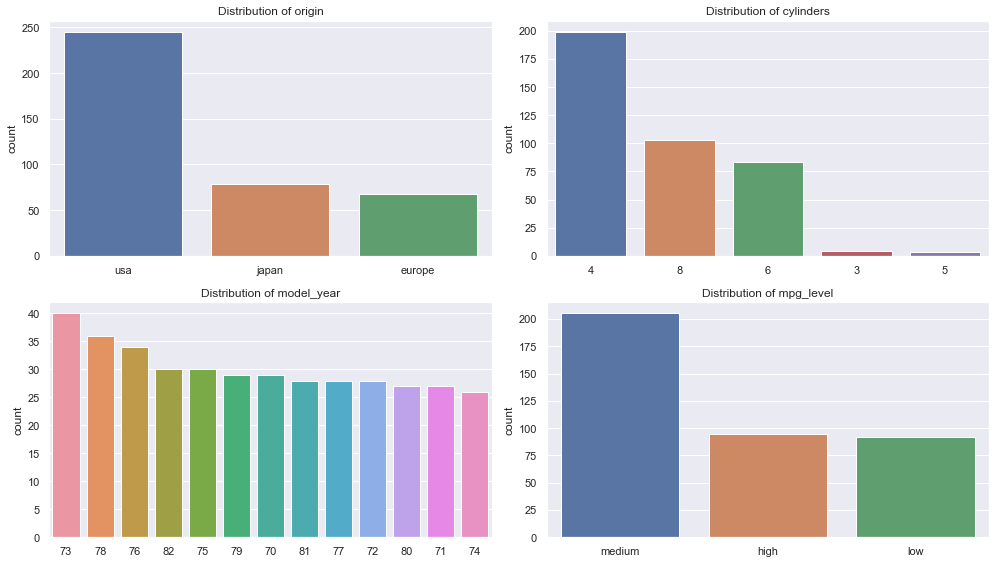

In [59]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [60]:
for i,cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

`usa` alone contributes to 62.5% of origin
`4` alone contributes to 50.77% of cylinders
`73` alone contributes to 10.2% of model_year
`medium` alone contributes to 52.3% of mpg_level


In [61]:
df_cat.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [62]:
print(f'total unique categories in `name`: {df_cat.name.nunique()}')
print(f"\nunique categories in `name`:\n\n {df_cat.name.unique()}")

total unique categories in `name`: 301

unique categories in `name`:

 ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111

In [63]:
df_cat['car_company'] = df_cat['name'].apply(lambda x: x.split()[0])

# remove car company from `name` and rename to `car_name`
df_cat['car_name'] = df_cat['name'].apply(lambda x: ' '.join(x.split()[1:]))
df_cat.drop('name', axis=1, inplace=True)

cats.extend(['car_company', 'car_name'])
cats.remove('name')

print(f'categorical variables:  {cats}')
df_cat.head()

categorical variables:  ['origin', 'cylinders', 'model_year', 'mpg_level', 'mpg_level', 'mpg_level', 'car_company', 'car_name']


,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,medium,ford,torino


In [64]:
print(f'total unique categories in `car_company`: {df_cat.car_company.nunique()}')
print(f"\nunique categories in `car_company`:\n\n {df_cat.car_company.unique()}")

total unique categories in `car_company`: 37

unique categories in `car_company`:

 ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


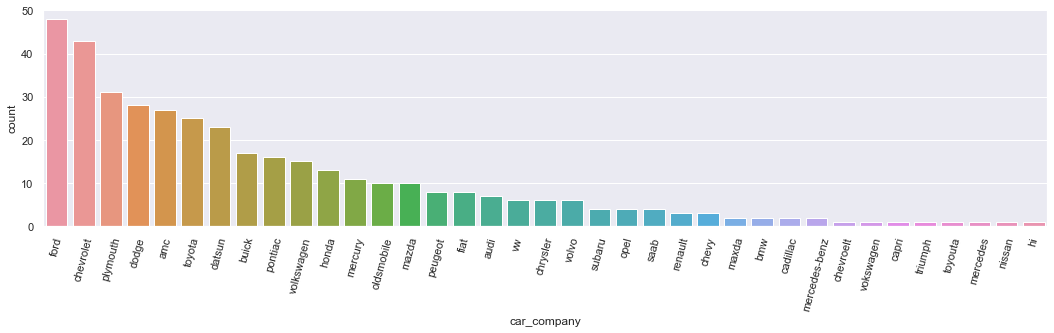

In [65]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(df_cat['car_company'], order=df_cat['car_company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

In [66]:
df_cat.car_company.value_counts()[:2]

ford         48
chevrolet    43
Name: car_company, dtype: int64

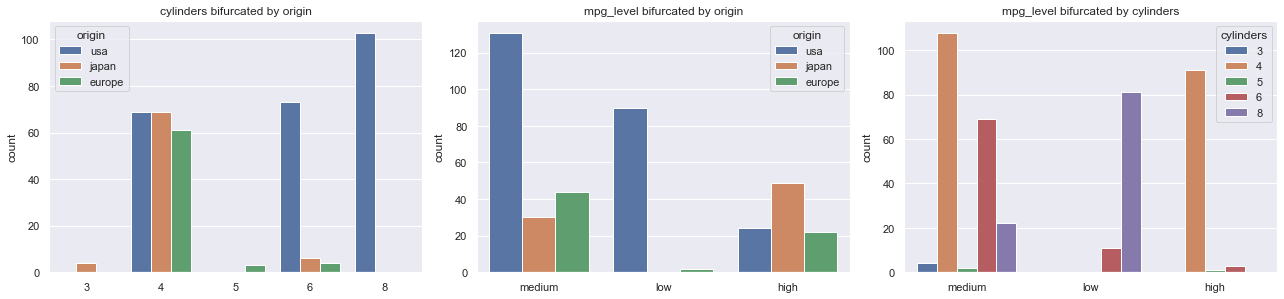

In [67]:
combos = itertools.combinations(['origin', 'cylinders', 'mpg_level'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
#     i+=1
#     ax = plt.subplot(2,3,i)
#     sns.countplot(x=pair[0], hue=pair[1], data=df_cat)
#     ax.set_xlabel(None)
#     ax.set_title(f'{pair[0]} bifurcated by {pair[1]}')
#     plt.tight_layout()

    i+=1
    ax = plt.subplot(2,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cat)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

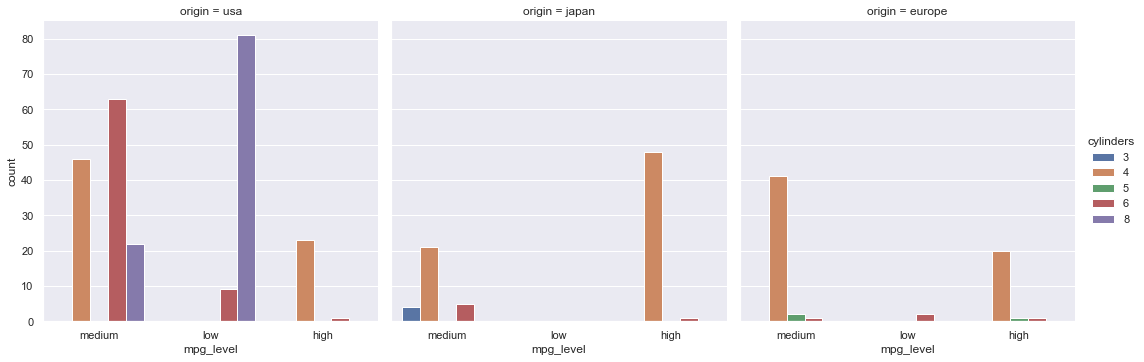

In [68]:
sns.catplot(x='mpg_level', hue='cylinders', col='origin', data=df_cat, kind='count')
plt.show()

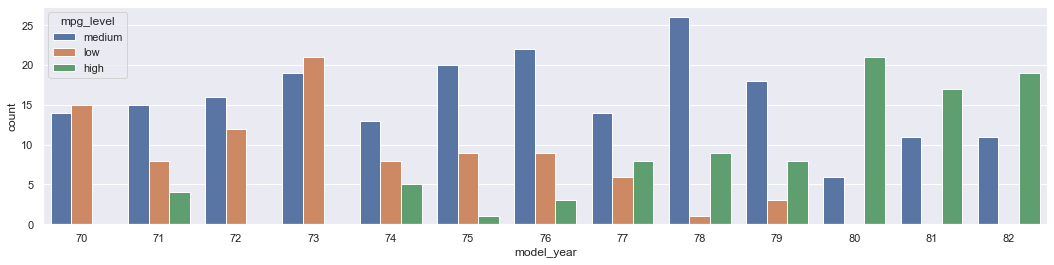

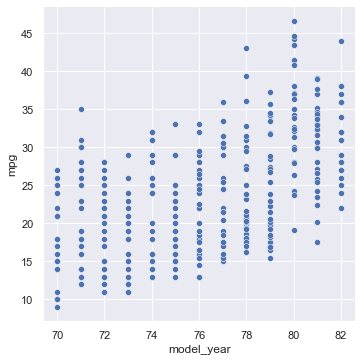

In [69]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='mpg_level', data=df_cat)
sns.relplot(x='model_year', y='mpg', data=df)
plt.show()

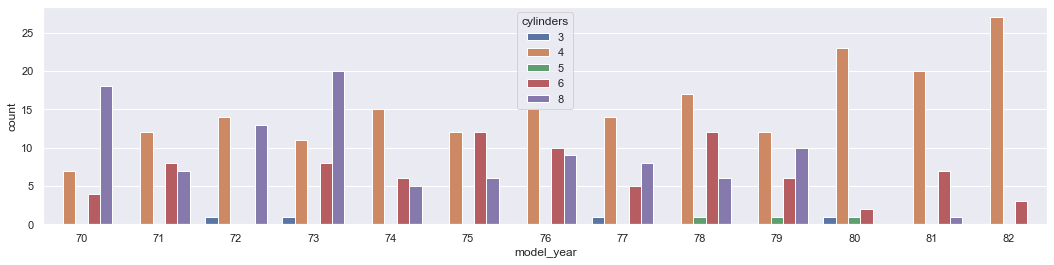

In [70]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='cylinders', data=df_cat)
plt.show()

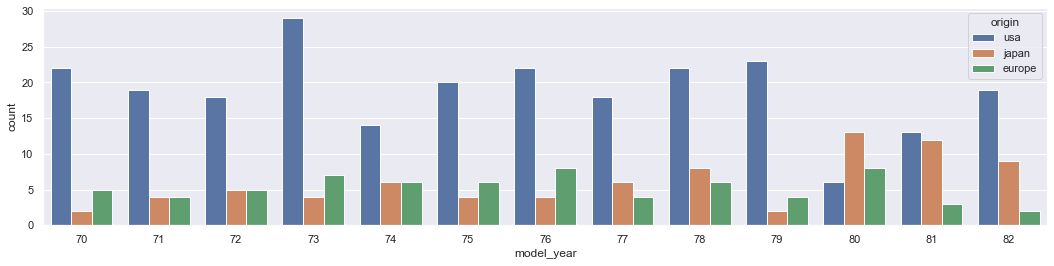

In [71]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='origin', data=df_cat)
plt.show()

In [72]:
top_car_companies = df_cat.car_company.value_counts()[:15].index
top_car_companies

Index(['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile',
       'mazda', 'peugeot'],
      dtype='object')

In [73]:
df_cat_top_comp = df_cat[df_cat.car_company.isin(top_car_companies)]
df_cat_top_comp.shape

(325, 6)

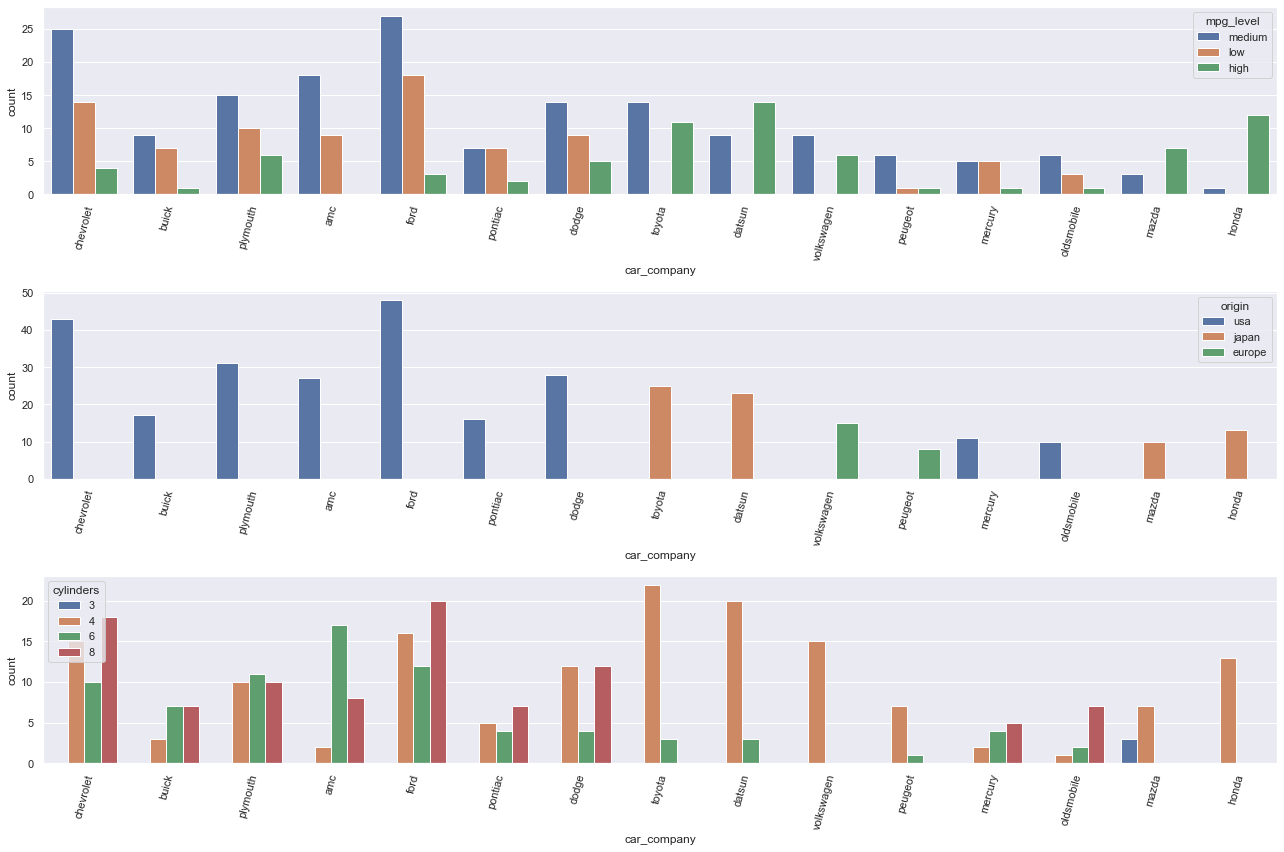

In [74]:
fig = plt.figure(1, (18,12))

for i,cat in enumerate(['mpg_level', 'origin', 'cylinders']):
    ax = plt.subplot(3,1,i+1)
    sns.countplot(x='car_company', hue=cat, data=df_cat_top_comp)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    plt.tight_layout()

In [75]:
df = pd.concat((df_cat.loc[:, 'origin':'car_company'], df.loc[:, 'mpg':'acceleration']), axis=1)
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [77]:
df.to_csv("mpg_cated.csv", index=False)

# Numerical Analysis

In [78]:
df = pd.read_csv("mpg_cated.csv")
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [79]:
print(f'numerical variables:  {nums}')

numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [80]:
df_num = df.loc[:, 'mpg':]
df_num.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will 

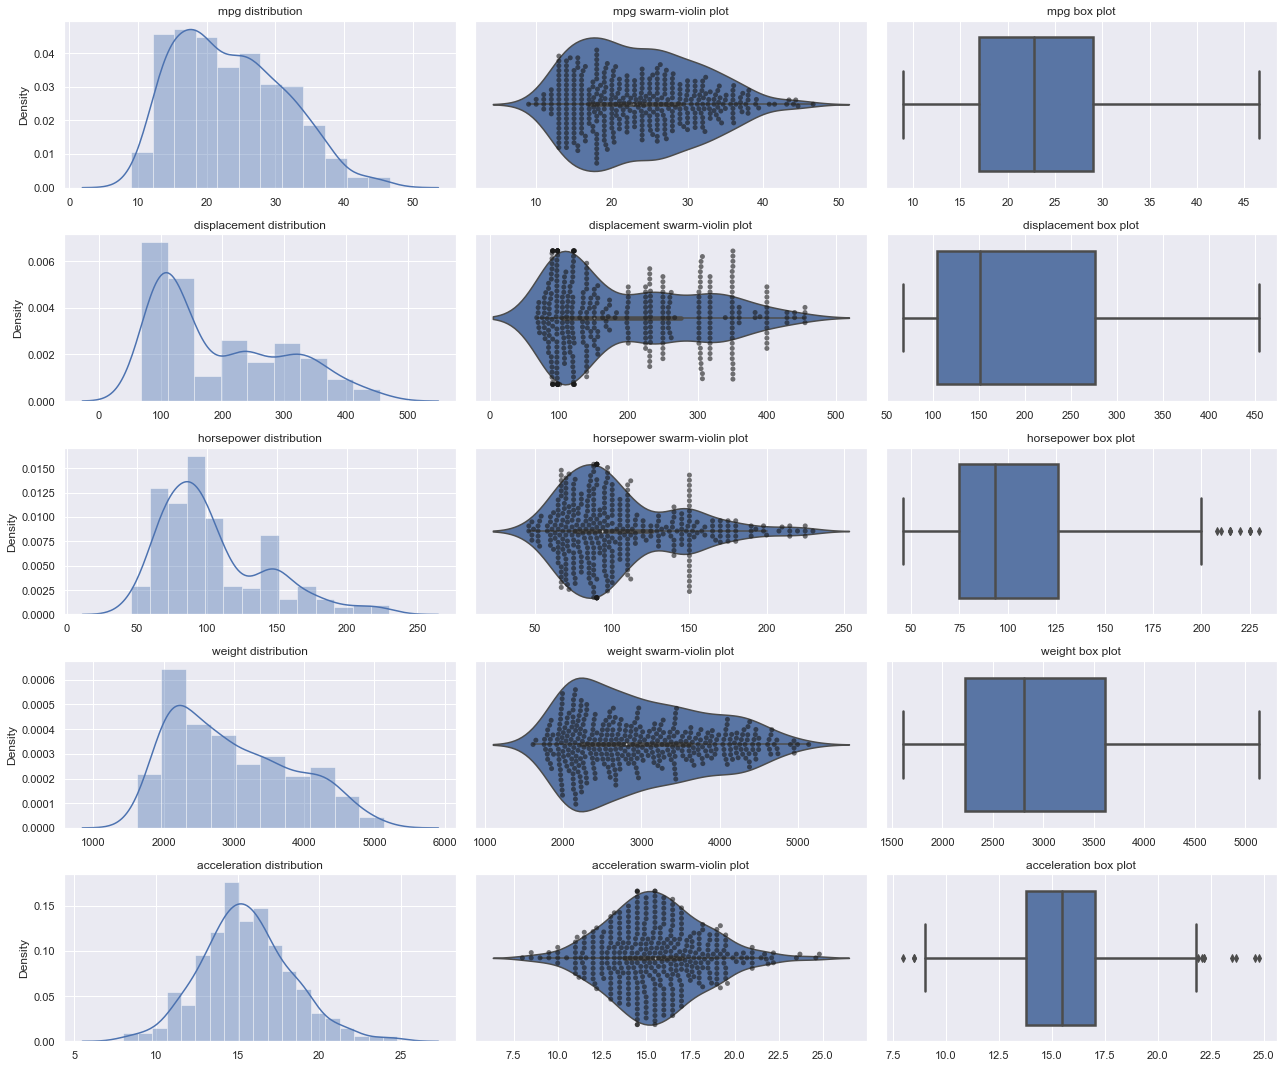

In [81]:
rows = len(nums)
cols = 3

fig = plt.figure(1, (18, rows*3))

i = 0
for col in nums:
    
    i += 1
    ax1 = plt.subplot(rows, cols,i)
#     ax1.hist(df[col], alpha=0.6)
    sns.distplot(df_num[col])
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.violinplot(df_num[col])
    sns.swarmplot(df_num[col], alpha=0.6, color='k')
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} swarm-violin plot')
    plt.tight_layout()

    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()

variation of numerical features with origin


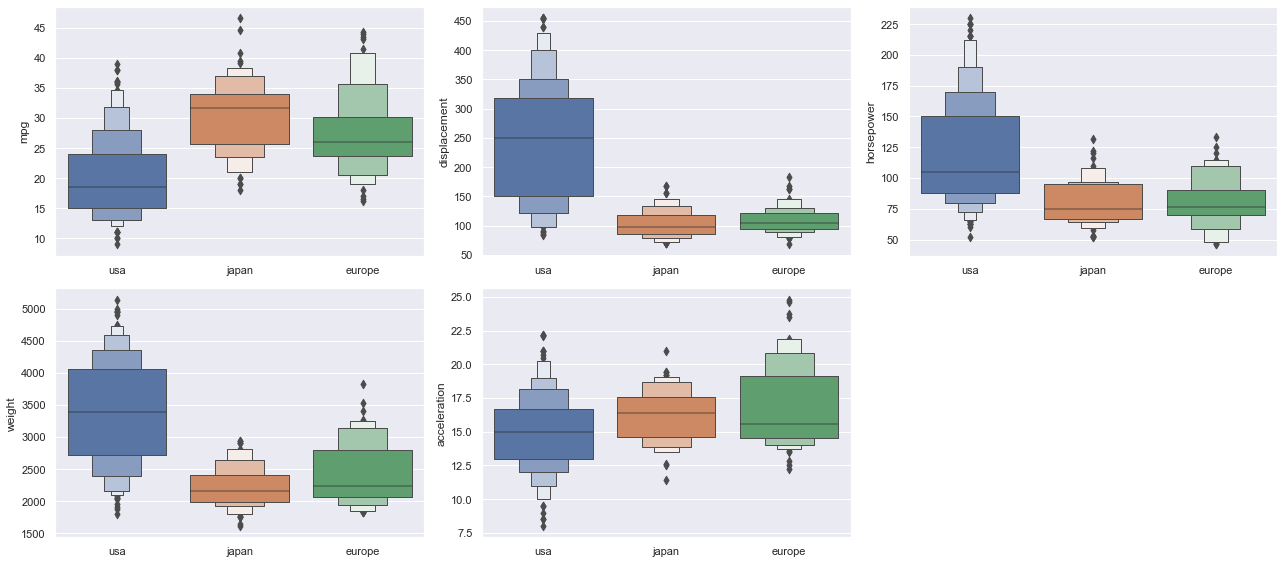

In [82]:
print('variation of numerical features with origin')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='origin', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

variation of numerical features with mpg_level


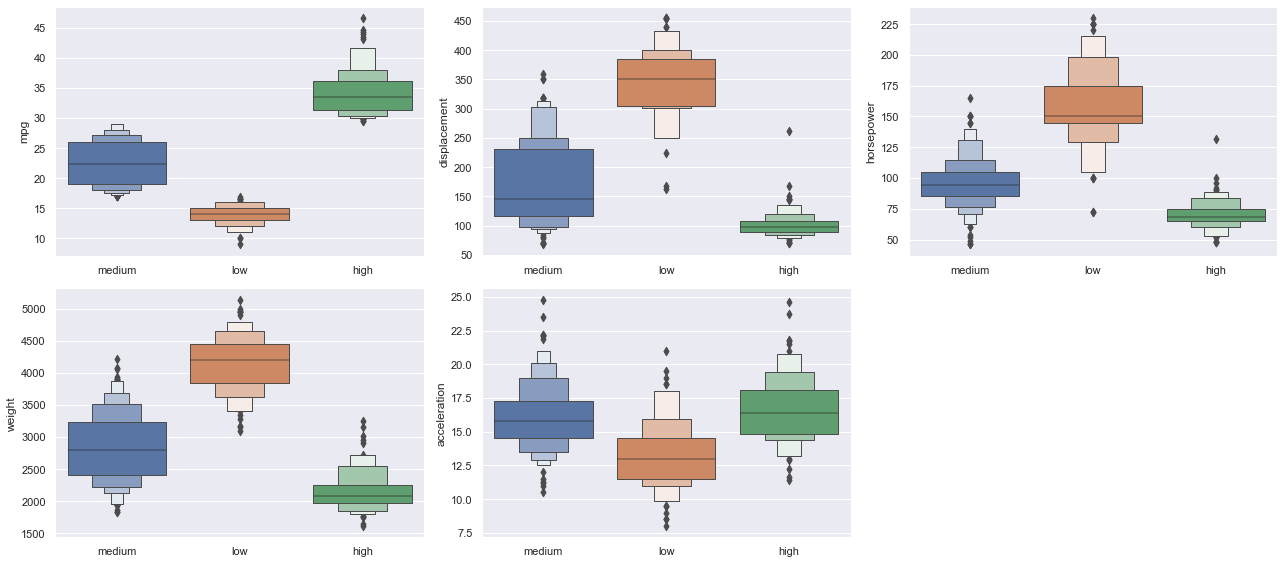

In [83]:
print('variation of numerical features with mpg_level')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='mpg_level', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

variation of numerical features with cylinders


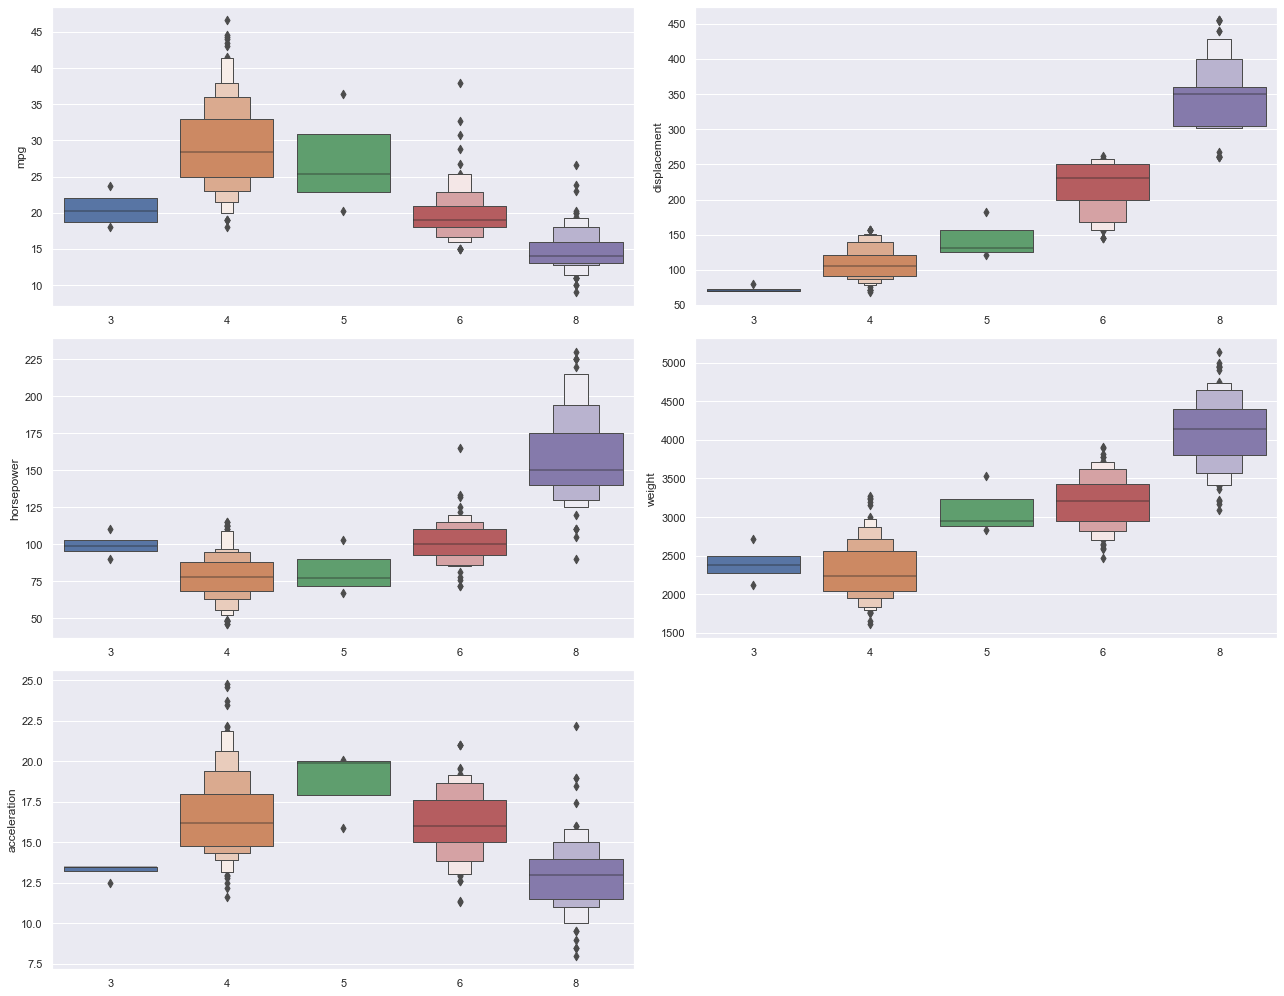

In [84]:
print('variation of numerical features with cylinders')

fig = plt.figure(1, (18, 14))

for idx,col in enumerate(nums):
    ax = plt.subplot(3, 2, idx+1)
    sns.boxenplot(x='cylinders', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

variation of numerical features with model_year


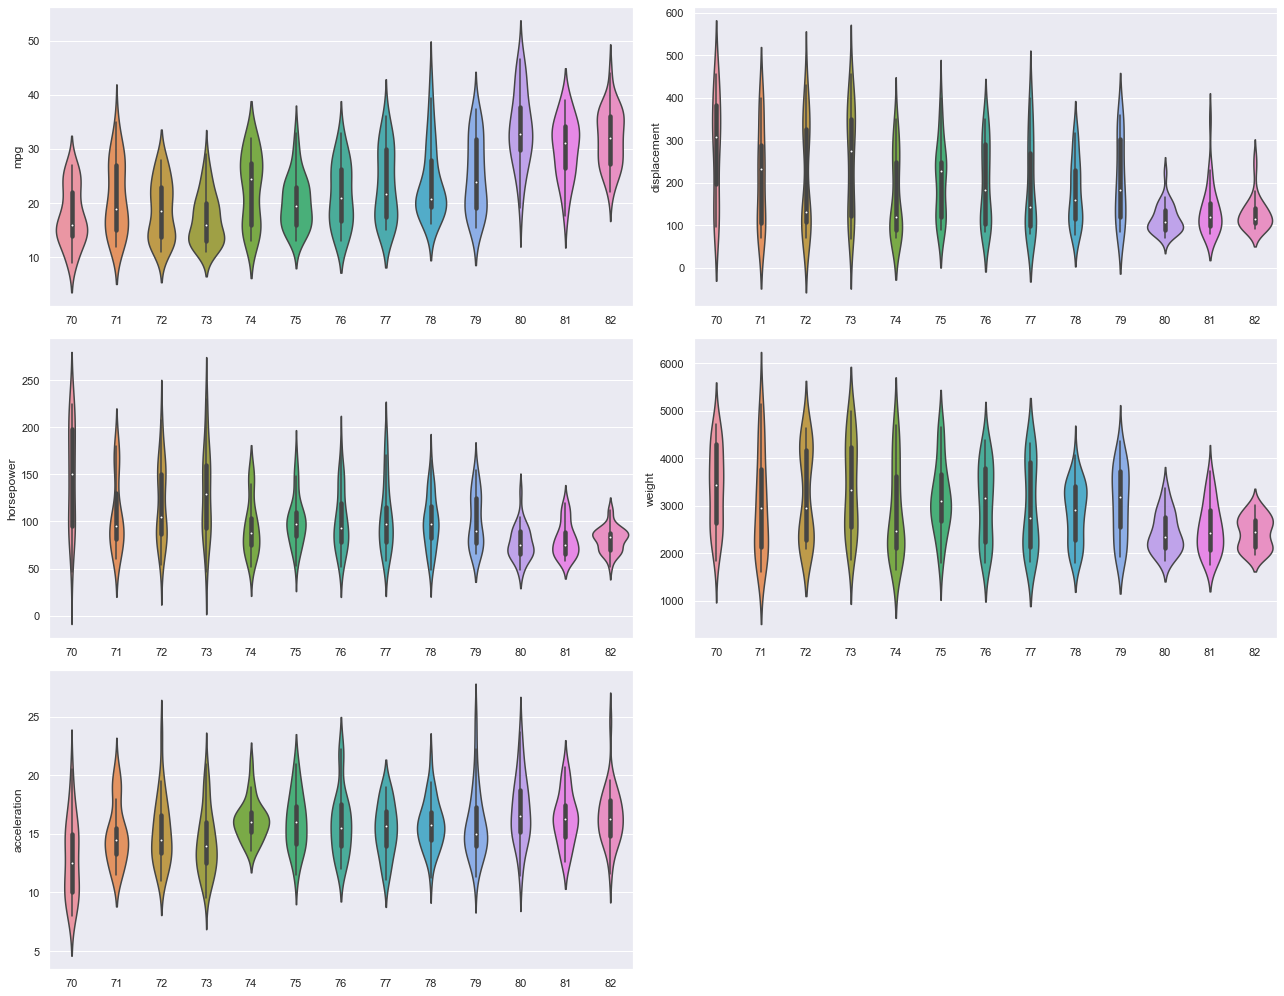

In [85]:
print('variation of numerical features with model_year')

fig = plt.figure(1, (18, 14))
# fig.tight_layout()

for idx,col in enumerate(nums):
    ax = plt.subplot(3, 2, idx+1)
    sns.violinplot(x='model_year', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

variation of numerical features with model_year bifurcated by origin


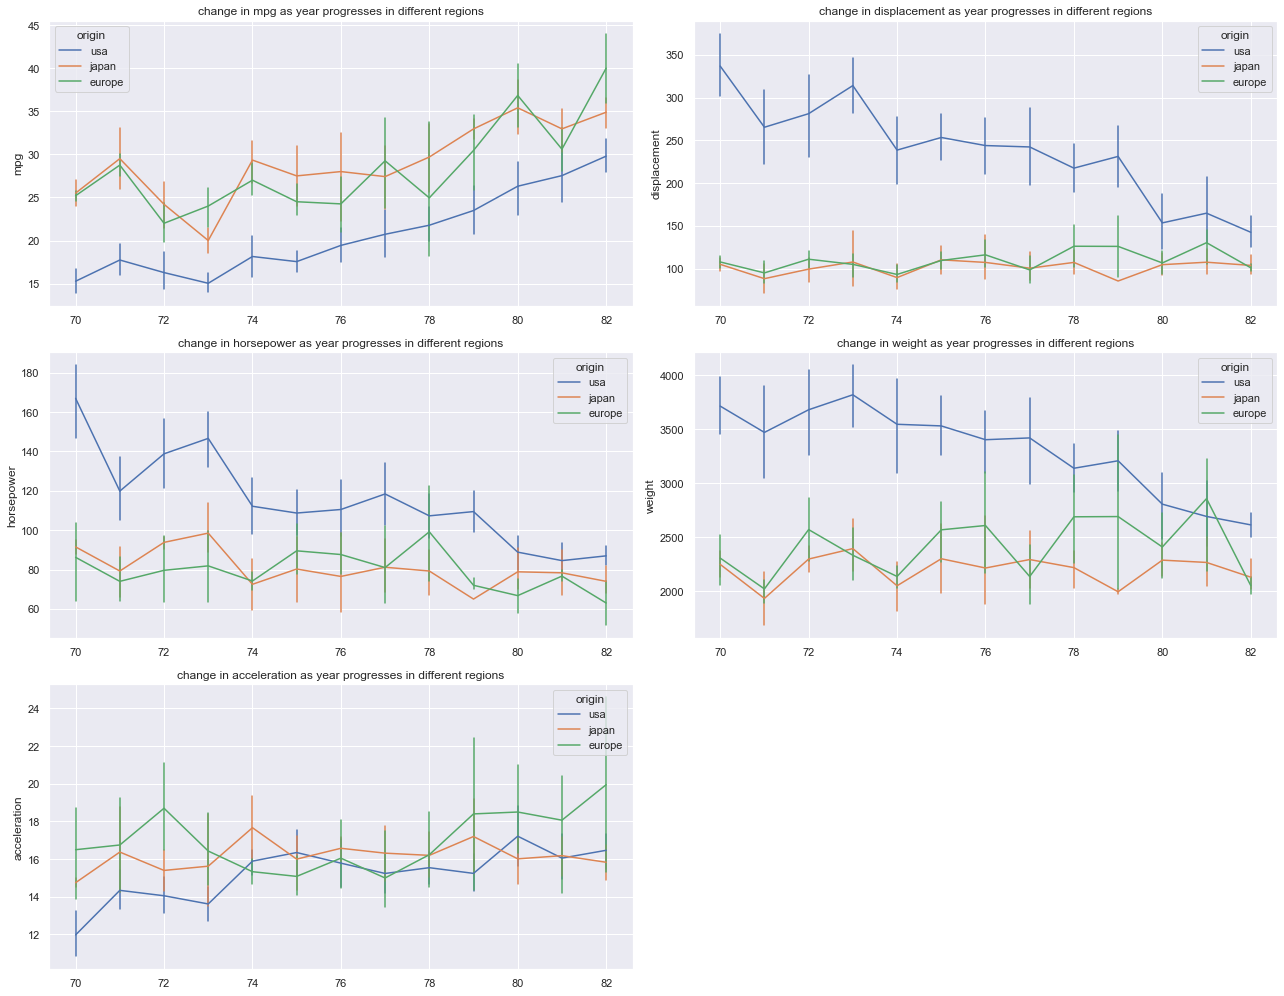

In [86]:
print('variation of numerical features with model_year bifurcated by origin')

fig = plt.figure(1, (18, 14))
# fig.tight_layout()

for idx,col in enumerate(nums):
    ax = plt.subplot(3, 2, idx+1)
    sns.lineplot(x="model_year", y=col, hue='origin', data=df, err_style='bars')
    ax.set_title(f'change in {col} as year progresses in different regions')
    ax.set_xlabel(None)
    plt.tight_layout()

plt.show()

# STATISTICAL ANALYSIS

In [87]:
ALPHA = 0.05

In [88]:
pd.crosstab(df.origin, df.model_year)

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,8,3,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,19,18,29,14,20,22,18,22,23,6,13,19


In [89]:
observed_values = pd.crosstab(df.origin, df.mpg_level).values
observed_values

array([[ 22,   2,  44],
       [ 49,   0,  30],
       [ 24,  90, 131]])

In [90]:
chi2, p, dof, expected_values = stats.chi2_contingency(observed_values)
chi2, p, dof, expected_values

(123.76491109767298,
 8.381476294026467e-26,
 4,
 array([[ 16.47959184,  15.95918367,  35.56122449],
        [ 19.14540816,  18.54081633,  41.31377551],
        [ 59.375     ,  57.5       , 128.125     ]]))

In [91]:
if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA} `origin` & `model_year` are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA} `origin` & `model_year` are independent.')

Rejected H0 under significance level 0.05 `origin` & `model_year` are dependent.


In [92]:
df_cat_label =  pd.concat([df.loc[:, ['origin', 'mpg_level']].apply(lambda x: LabelEncoder().fit_transform(x)),
                           df.loc[: , 'cylinders': 'model_year']], axis=1)

df_cat_label.head()

,origin,mpg_level,cylinders,model_year
0,2,2,8,70
1,2,1,8,70
2,2,2,8,70
3,2,1,8,70
4,2,2,8,70


In [93]:
chi2_res = feature_selection.chi2(df_cat_label, df.mpg_level)
df_chi2 = pd.DataFrame({
    'attr1': 'mpg_level',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA
})
df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,mpg_level,origin,28.395578,6.823049e-07,0.05,rejected,dependent
1,mpg_level,mpg_level,210.159363,2.314591e-46,0.05,rejected,dependent
2,mpg_level,cylinders,127.418999,2.144450e-28,0.05,rejected,dependent
3,mpg_level,model_year,21.742075,1.900065e-05,0.05,rejected,dependent


In [94]:
nums

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


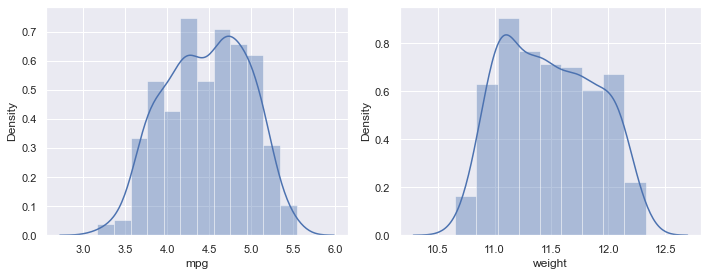

In [95]:
fig = pyplot.figure(1, (10, 4))

ax = pyplot.subplot(1,2,1)
sns.distplot(np.log2(df.mpg))
pyplot.tight_layout()

ax = pyplot.subplot(1,2,2)
sns.distplot(np.log2(df.weight))
pyplot.tight_layout()

pyplot.show()

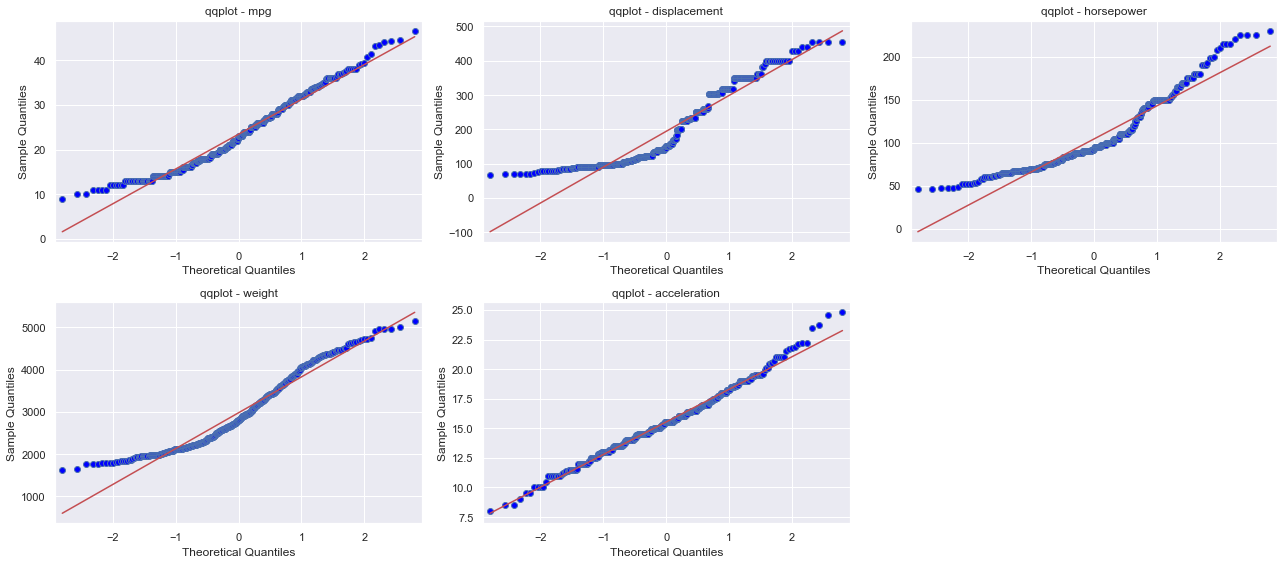

In [96]:
fig = pyplot.figure(1, (18,8))

for i,num in enumerate(nums):
    ax = pyplot.subplot(2,3,i+1)
    qqplot(df[num], line= 's', ax=ax)
    ax.set_title(f'qqplot - {num}')
    pyplot.tight_layout()

In [97]:
def shapiro_wilk_test(df: pd.DataFrame, cols: list, alpha=0.05):
    # test the null hypothesis for columns given in `cols` of the dataframe `df` under significance level `alpha`.
    for col in cols:
        _,p = stats.shapiro(df[col])
        if p <= alpha:
            print(f'''\nRejected H0 under significance level {alpha}\n{col} doesn't seems to be normally distributed''')
        else:
            print(f'''\nFail to reject H0 due to lack of evidence under significance level {alpha}\n{col} seem to be normally distributed''')

In [98]:
shapiro_wilk_test(df, nums)


Rejected H0 under significance level 0.05
mpg doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
displacement doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
weight doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
acceleration doesn't seems to be normally distributed


In [99]:
_, p = stats.shapiro(df.acceleration)
p

0.03054318018257618

In [100]:
from sklearn.preprocessing import PowerTransformer

df_tfnum = pd.DataFrame(PowerTransformer().fit_transform(df[nums]), columns=nums)
df_tfnum.head()

/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,mpg,displacement,horsepower,weight,acceleration
0,-0.635451,1.119336,0.854984,0.0,-1.317572
1,-1.142697,1.324530,1.443754,0.0,-1.522941
2,-0.635451,1.175211,1.216062,0.0,-1.732292
3,-0.965340,1.103648,1.216062,0.0,-1.317572
4,-0.796543,1.093078,1.044925,0.0,-1.945873


/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/siddheshmore/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

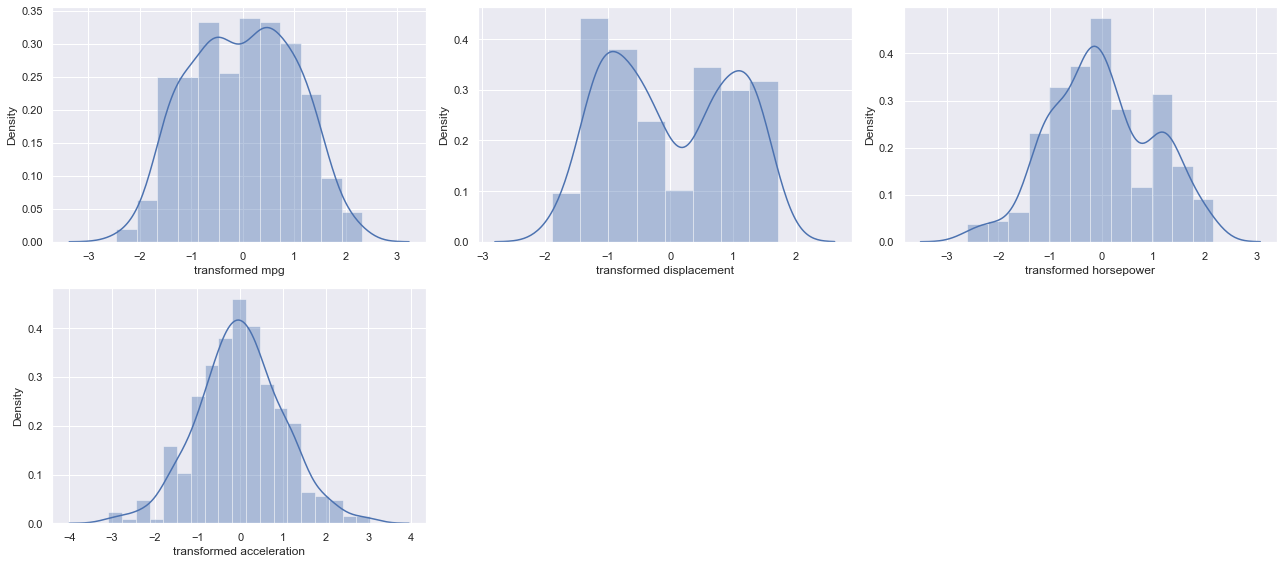

In [101]:
fig = pyplot.figure(1, (18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = pyplot.subplot(2,3,i+1)
    sns.distplot(df_tfnum[num])
    ax.set_xlabel(f'transformed {num}')
    pyplot.tight_layout()

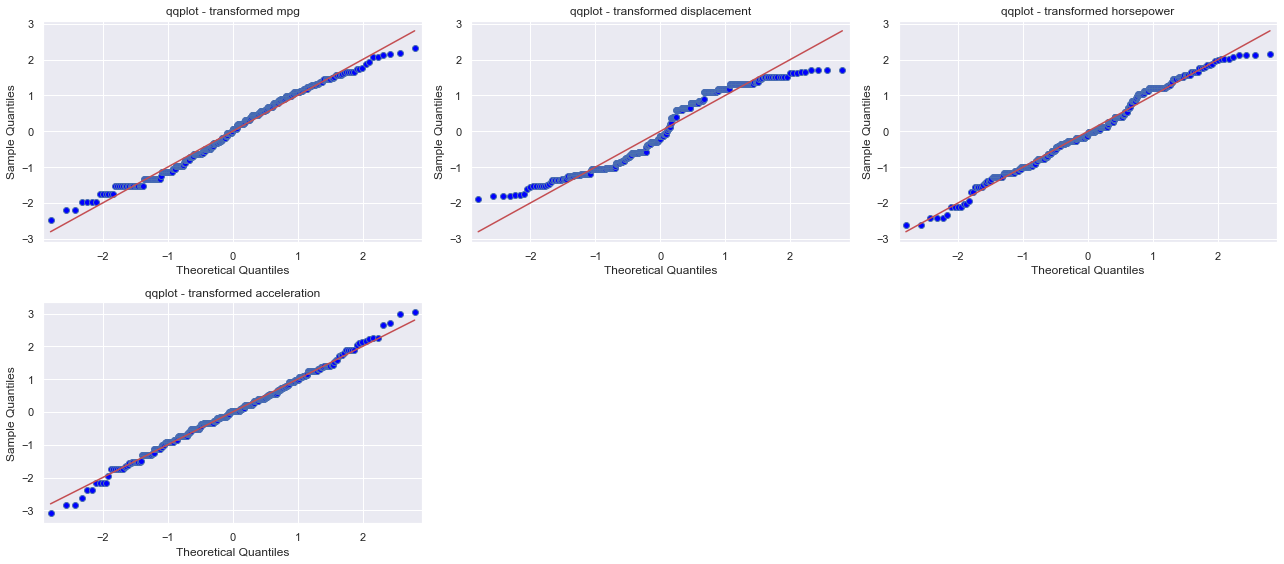

In [102]:
fig = pyplot.figure(1, (18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = pyplot.subplot(2,3,i+1)
    qqplot(df_tfnum[num], line='s', ax=ax)
    ax.set_title(f'qqplot - transformed {num}')
    pyplot.tight_layout()

In [103]:
shapiro_wilk_test(df[df.origin=='japan'], ['acceleration'])
shapiro_wilk_test(df[df.origin=='usa'], ['acceleration'])


Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed


In [104]:
_, p = stats.ttest_ind(df[df.origin=='japan'].acceleration, df[df.origin=='usa'].acceleration, equal_var=False)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [105]:
_, p = stats.f_oneway(df[df.origin=='japan'].acceleration, df[df.origin=='usa'].acceleration, df[df.origin=='europe'].acceleration)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [106]:
shapiro_wilk_test(df[df.origin=='japan'], ['horsepower'])


Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed


In [107]:
shapiro_wilk_test(df[df.origin=='europe'], ['horsepower'])


Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed


In [108]:
shapiro_wilk_test(df[df.origin=='usa'], ['horsepower'])


Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed


In [109]:
_, p = stats.kruskal(df[df.origin=='japan'].horsepower, df[df.origin=='usa'].horsepower, df[df.origin=='europe'].horsepower)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [110]:
_, p = stats.mannwhitneyu(df[df.mpg_level=='high'].acceleration, df[df.mpg_level=='medium'].acceleration)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [111]:
acc_gb_year = df.groupby('model_year')['mpg']

acc_yr = []
for yr in df.model_year.unique():
    acc_yr.append(list(acc_gb_year.get_group(yr)))
    
_, p = stats.kruskal(*acc_yr)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [112]:
result_f = feature_selection.f_classif(df.loc[:, 'mpg': 'acceleration'], df.cylinders)
anova_test_cat = pd.DataFrame({
    'cat-attr': 'cylinders',
    'cont-attr': df.loc[:, 'mpg': 'acceleration'].columns,
    'f': result_f[0],
    'p': result_f[1],
    'alpha': ALPHA
})
anova_test_cat['H0'] = anova_test_cat.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
anova_test_cat['relation'] = anova_test_cat.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
anova_test_cat

,cat-attr,cont-attr,f,p,alpha,H0,relation
0,cylinders,mpg,172.954629,8.785541e-85,0.05,rejected,dependent
1,cylinders,displacement,933.260216,3.054493e-197,0.05,rejected,dependent
2,cylinders,horsepower,297.855648,1.079822e-116,0.05,rejected,dependent
3,cylinders,weight,414.851887,1.751845e-138,0.05,rejected,dependent
4,cylinders,acceleration,48.677596,3.709542e-33,0.05,rejected,dependent


In [113]:
result_f = feature_selection.f_classif(df_cat_label[['origin', 'cylinders', 'model_year']], df.mpg)
anova_test_cat = pd.DataFrame({
    'cont-attr': 'mpg',
    'cat-attr': ['origin', 'cylinders', 'model_year'],
    'f': result_f[0],
    'p': result_f[1],
    'alpha': ALPHA
})
anova_test_cat['H0'] = anova_test_cat.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
anova_test_cat['relation'] = anova_test_cat.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
anova_test_cat

,cont-attr,cat-attr,f,p,alpha,H0,relation
0,mpg,origin,2.345244,3.516516e-09,0.05,rejected,dependent
1,mpg,cylinders,12.104269,2.855307e-63,0.05,rejected,dependent
2,mpg,model_year,3.795294,3.748099e-20,0.05,rejected,dependent
